# Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand/data<br>
Count를 예측 하는 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
test_df = pd.read_csv('./data/test.csv', parse_dates=['datetime'])
train_df = pd.read_csv('./data/train.csv', parse_dates=['datetime'])
#읽을때 아예 parse_dates로 읽으면 날짜정보로 읽어옴
#시간이나 연월연도 등 뽑을때 편함

In [23]:
test_df.shape, train_df.shape
#보니깐 train에는 count, casual, registered columns가 더 있음. 

((6493, 9), (10886, 12))

In [27]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
#아래로 이어 붙인 거야. 그러니깐 reset_index한거지 
all_df.head()
all_df.tail() # 역시 아래 tail하면 NaN값이 있음. 

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [39]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))
#인덱스 뽑아 놓으면 좋지 나중에 분리할때 좋아

In [41]:
#null값 찾아보기
all_df.isnull().sum()
#다행히 null이 없네

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

### Evaluation Metrics 만들기
식은 kaggle에 있음. 

In [46]:
x = np.array([np.inf, -np.inf, np.nan, -128, 12])
np.nan_to_num(x)
#nan_to_num은 nan값을 매우 작은 값으로 변환 시켜줌
#nan값이 안나오게 해줌. inf는 매우 큰값으로 변환 시켜줌. 

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.20000000e+001])

In [49]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y+1))
    #여기서 log안이 -가 된다는 뜻이잖아. 그러면 NaN이 뜨고 그때를 말하는 것. 
    log2 = np.nan_to_num(np.log(y_+1))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))

In [59]:
submission_df = pd.read_csv("./data/sampleSubmission.csv")

In [65]:
submission_df.head()
#count all 0으로 되있음

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [66]:
rmsle(submission_df["count"].values,
      np.random.randint(0, 100, size=len(sumission_df)))
#count랑 아무거나 해서 그냥 rmsle잘 되나 테스트 해본거야

3.7400631356717824

In [69]:
#casual 이랑 registered는 안쓸꺼
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

KeyError: 'casual'

In [70]:
all_df

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0000,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0000,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0000,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0000,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0000,0
5,12.880,1.0,2011-01-01 05:00:00,0,75,1,9.84,2,6.0032,0
6,13.635,2.0,2011-01-01 06:00:00,0,80,1,9.02,1,0.0000,0
7,12.880,3.0,2011-01-01 07:00:00,0,86,1,8.20,1,0.0000,0
8,14.395,8.0,2011-01-01 08:00:00,0,75,1,9.84,1,0.0000,0
9,17.425,14.0,2011-01-01 09:00:00,0,76,1,13.12,1,0.0000,0


#### 일단 season, weather등의 카테고리형 데이터를 one-hot인코딩으로 

In [87]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
#양쪽의 인덱스 모두를 merge_key로 사용하겠다는 것. left_index, right_index = True
# prefix

In [88]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)


In [89]:
pre_df

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0000,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0000,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0000,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0000,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0000,0,1,0,0,0,1,0,0,0
5,12.880,1.0,2011-01-01 05:00:00,0,75,1,9.84,2,6.0032,0,1,0,0,0,0,1,0,0
6,13.635,2.0,2011-01-01 06:00:00,0,80,1,9.02,1,0.0000,0,1,0,0,0,1,0,0,0
7,12.880,3.0,2011-01-01 07:00:00,0,86,1,8.20,1,0.0000,0,1,0,0,0,1,0,0,0
8,14.395,8.0,2011-01-01 08:00:00,0,75,1,9.84,1,0.0000,0,1,0,0,0,1,0,0,0
9,17.425,14.0,2011-01-01 09:00:00,0,76,1,13.12,1,0.0000,0,1,0,0,0,1,0,0,0


In [90]:
#datetime을 연월일로 나누기
pre_df["year"]=pre_df["datetime"].dt.year
pre_df["month"]=pre_df["datetime"].dt.month
pre_df["day"]=pre_df["datetime"].dt.day
pre_df["hour"]=pre_df["datetime"].dt.hour
pre_df["weekday"]=pre_df["datetime"].dt.weekday

In [91]:
pre_df = pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
#월화수목금토일을 다시 one-hot

In [95]:
pre_df.dtypes #다 int나 float으로 됨

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [96]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [98]:
pre_df.dtypes #굳이 카테고리형으로 바꿈

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [99]:
train_df = pre_df.iloc[train_index]

In [100]:
train_df

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0000,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0000,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0000,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0000,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0000,0,...,1,4,5,0,0,0,0,0,1,0
5,12.880,1.0,2011-01-01 05:00:00,0,75,1,9.84,2,6.0032,0,...,1,5,5,0,0,0,0,0,1,0
6,13.635,2.0,2011-01-01 06:00:00,0,80,1,9.02,1,0.0000,0,...,1,6,5,0,0,0,0,0,1,0
7,12.880,3.0,2011-01-01 07:00:00,0,86,1,8.20,1,0.0000,0,...,1,7,5,0,0,0,0,0,1,0
8,14.395,8.0,2011-01-01 08:00:00,0,75,1,9.84,1,0.0000,0,...,1,8,5,0,0,0,0,0,1,0
9,17.425,14.0,2011-01-01 09:00:00,0,76,1,13.12,1,0.0000,0,...,1,9,5,0,0,0,0,0,1,0


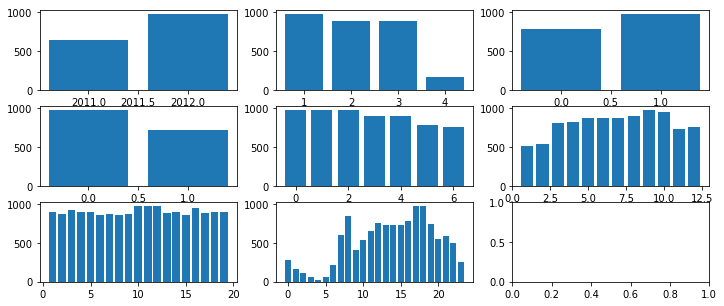

In [102]:
#y와 나머지가 얼마나 연관관계가 있나 보는거야
#이걸 뭐라고 하는데 그걸 까먹었다. 
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

시각화된 데이터 보면서 데이터 파악한다! <br>
필요에 따라 count해서 평균으로 보고 싶을 때도 있을 거야<br>

In [107]:
series_data = train_df.groupby(["year", "month"])['count'].mean()

In [109]:
series_data
#매달 얼마나 빌리는지 알 수 있음. 

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

In [113]:
len(series_data)

24

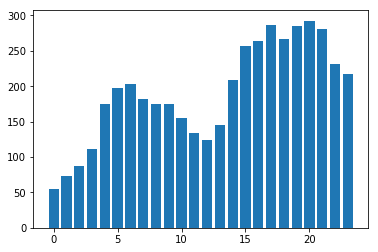

In [124]:
fix, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

Kaggle eda 찾아보기

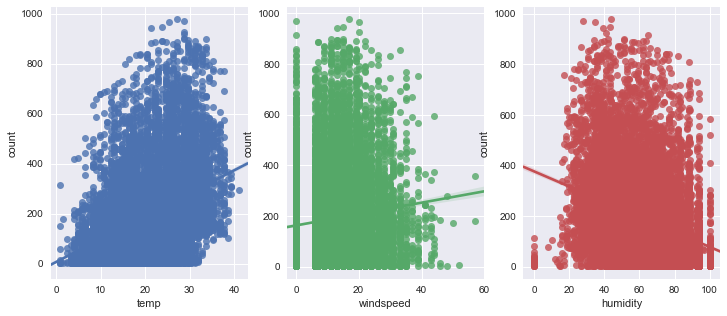

In [128]:
import seaborn as sn

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x='temp', y='count', data=train_df, ax=ax1)
sn.regplot(x='windspeed', y='count', data=train_df, ax=ax2)
sn.regplot(x='humidity', y='count', data=train_df, ax=ax3)
#위 3개는 continuous type의 데이터 

plt.show()

In [129]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

#### Data 간의 상관관계 Check
특히 continuous 

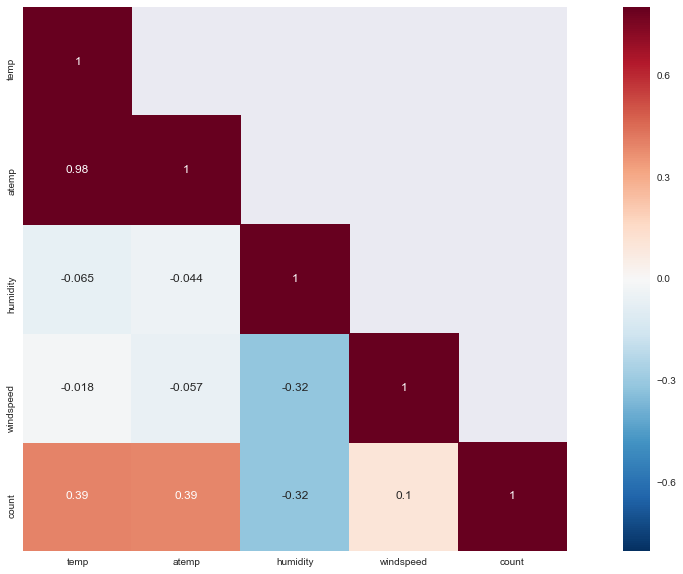

In [137]:
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

temp와 atemp의 상관관계가 매우 높음 <br>
거의 같은 데이터라는 것. <br>
이 정도면 빠지는게 좋음. <br>
나머지 비슷하네

In [146]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [184]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

모든 피쳐를 돌아가면서 combination 넣어보자

In [185]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [186]:
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [187]:
all_variable_list = continuous_variable_list + category_varialbe_list

In [188]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [189]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [190]:
number_of_variables = len(all_variable_list)
number_of_variables
#총 변수 15개(one-hot한거는 세트로 하나네) 

15

모든 경우의 수를 다 찾는거야<br>
최소 8개부터 모든 갯수까지 사용해서 전체 combination 찾아봐

In [200]:
variable_combinations = []
import itertools
for L in range(8, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)

all_variable_list의 모든 요소를 돌면서 L개씩 묶는 모든 조합을 다 찾으러 다님<br>


In [202]:
variable_combinations[0]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather']

In [203]:
len(variable_combinations)

#사실 이렇게 많이 안함
#시간 얼마나 걸리든 여기서는 그냥 직접 다 넣어보는 거야. 

16384

In [204]:
del pre_df["count"]

In [205]:
pre_df

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0000,0,1,...,1,0,5,0,0,0,0,0,1,0
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0000,0,1,...,1,1,5,0,0,0,0,0,1,0
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0000,0,1,...,1,2,5,0,0,0,0,0,1,0
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0000,0,1,...,1,3,5,0,0,0,0,0,1,0
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0000,0,1,...,1,4,5,0,0,0,0,0,1,0
5,12.880,2011-01-01 05:00:00,0,75,1,9.84,2,6.0032,0,1,...,1,5,5,0,0,0,0,0,1,0
6,13.635,2011-01-01 06:00:00,0,80,1,9.02,1,0.0000,0,1,...,1,6,5,0,0,0,0,0,1,0
7,12.880,2011-01-01 07:00:00,0,86,1,8.20,1,0.0000,0,1,...,1,7,5,0,0,0,0,0,1,0
8,14.395,2011-01-01 08:00:00,0,75,1,9.84,1,0.0000,0,1,...,1,8,5,0,0,0,0,0,1,0
9,17.425,2011-01-01 09:00:00,0,76,1,13.12,1,0.0000,0,1,...,1,9,5,0,0,0,0,0,1,0


### 지금 전략은 16000개의 조합을 다 넣어보는 거야. 
그리고 linear, ridge, lasso를 돌려보는거야. 

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf= KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(varaible_combinations))
ts = datetime.datetime.now()
#현재 시간
for i, combination in enumerate(varaible_combinations):
    #i는 count, combination은 조합
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    #일단 pre_df는 train, test섞여있는거지. 
    #거기서 values만 뽑아서 std시키고, 
    #그중에서 train data만 뽑아서 X로 놓고, 
    #y는 위에서 std없이 count만 뽑아 놨지
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    #현재 train데이터를 다시 X를 10번 나눠서 train, test(validation)으로 split
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    #n번째 조합 
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    if i % 100 == 0:
        #100번 할때마다 현재시간과 이전시간을 찍어볼 수 있음.
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()
        

In [209]:
labels = ["combination", "lr", "ridge", "lasso"]
from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.453390,1.452092,1.439138
1,1,1.457821,1.456870,1.441897
2,2,1.465858,1.465260,1.455254
3,3,1.423371,1.423143,1.417983
4,4,1.306359,1.304990,1.288698


In [213]:
len(final_output)

6412

In [214]:
result_df.min()

combination    0.000000
lr             1.258871
ridge          1.258814
lasso          1.254718
dtype: float64

In [215]:
result_df["lr"].sort_values().head()
#lr일때는 4696번이 제일 좋음

4696    1.258871
4619    1.259224
3674    1.260361
4661    1.261734
3709    1.262267
Name: lr, dtype: float64

In [217]:
#이게 가장 좋은 combination 
#windspeed랑 temp가 가 빠져있음. 
#이게 별로 도움이 안된거야. 
#weekday가 더 좋네 그리고. 
variable_combinations[4752]

['humidity',
 'atemp',
 'workingday',
 'weather',
 'weekday',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [219]:
target_df = pre_df[variable_combinations[4752]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6493, 17)

In [222]:
models[4752][2] #이게 제일 좋게 나왔어

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [225]:
final_result = models[4661][2].predict(X_submission_test)
#이렇게 하면 0보다 작은 애들이 있어. 
#0보다 작으면 안됨
final_result[final_result<0] =0 

In [226]:
final_result

array([ 13.87136255,  38.74532808,  46.13147774, ..., 169.72397171,
       190.7329422 , 180.55471733])

In [227]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [228]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.871363
10887,2011-01-20 01:00:00,38.745328
10888,2011-01-20 02:00:00,46.131478
10889,2011-01-20 03:00:00,47.701195
10890,2011-01-20 04:00:00,55.087345


In [229]:
df_submission.set_index("datetime").to_csv("submission_lasso_data.csv")